<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 7

1. Buatlah model klasifikasi dengan machine learning dari dataset yang diberikan dengan ketentuan :
    - Gunakan metode CRISP-DM secara terurut dan lengkap
    - Gunakan algoritma linear regression, logistic regression, dan K-NN

2. Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?

In [3]:
#### Data Understanding

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("dataset_tm_10k.csv")

In [6]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [7]:
df.isnull().sum()

Flight            0
Time            873
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [8]:
#### Data preprocessing

In [9]:
length_missdata_percentage = (df['Length'].isnull().sum() / df.shape[0]) * 100
length_missdata_percentage

12.450171502734774

In [10]:
airline_missdata_percentage = (df['Airline'].isnull().sum() / df.shape[0]) * 100
airline_missdata_percentage

5.395383331788263

In [11]:
time_missdata_percentage = (df['Time'].isnull().sum() / df.shape[0]) * 100
time_missdata_percentage

8.093074997682395

In [12]:
meanImputation = df['Length'].mean() #Membuat variabel meanImputation untuk menampung nilai rata-rata dari kolom "Length"
meanImputation

133.42916137229986

In [13]:
df['Length'].fillna(meanImputation,
                    inplace=True)

In [14]:
df.isna().sum()

Flight           0
Time           873
Length           0
Airline        582
AirportFrom      0
AirportTo        0
DayOfWeek        0
Class            0
dtype: int64

In [15]:
medianImputation = df['Time'].median()
medianImputation

795.0

In [16]:
df['Time'].fillna(medianImputation, inplace=True)

In [17]:
df.isna().sum()

Flight           0
Time             0
Length           0
Airline        582
AirportFrom      0
AirportTo        0
DayOfWeek        0
Class            0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
import numpy as np

In [19]:
# Membuat algoritma SimpleImputer dengan strategi 'most_frequent'
modeImputer = SimpleImputer(strategy='most_frequent')

# Melakukan imputasi dengan SimpleImputer
imputed_data = modeImputer.fit_transform(df['Airline'].values.reshape(-1, 1))

# Memperbaharui data pada kolom Airline dengan data yang telah diimputasi pada imputed_data
df['Airline'] = imputed_data.flatten()

In [20]:
np.unique(imputed_data)

array(['9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ',
       'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV'], dtype=object)

In [21]:
df.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [22]:
#### Linear Regression

In [23]:
from sklearn.preprocessing import RobustScaler

In [24]:
scaler = RobustScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.176887,0.785714,WN,IAH,PHX,5,0
1,3045.0,-1.014151,-0.842857,OO,DSM,MKE,2,0
2,1560.0,-0.129717,1.885714,DL,SEA,CVG,7,0
3,1156.0,-0.471698,1.571429,WN,SNA,MDW,7,1
4,1873.0,-0.625000,0.114286,CO,IAH,MCO,6,1


In [25]:
X = df[['DayOfWeek']]
y = df['Class']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred_lr = lr.predict(X_test)

print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [0.46036239 0.44733425 0.45167696 ... 0.44733425 0.4647051  0.46036239]


In [30]:
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
7823,1,0.460362
6132,0,0.447334
9949,0,0.451677
10440,0,0.442992
9097,1,0.447334


In [31]:
y_predict_class = [1 if prob > 0.5 else 0 for prob in y_pred_lr]

In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy:"
      , round(accuracy_score(y_test, y_predict_class), 3))

Accuracy: 0.563


In [33]:
#### Logistic Regression

In [34]:
from sklearn.preprocessing import RobustScaler

In [35]:
scaler = RobustScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.176887,0.785714,WN,IAH,PHX,5,0
1,3045.0,-1.014151,-0.842857,OO,DSM,MKE,2,0
2,1560.0,-0.129717,1.885714,DL,SEA,CVG,7,0
3,1156.0,-0.471698,1.571429,WN,SNA,MDW,7,1
4,1873.0,-0.625000,0.114286,CO,IAH,MCO,6,1


In [36]:
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [38]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.176887,0.785714,15,125,199,4,0
1,3045.0,-1.014151,-0.842857,12,76,170,1,0
2,1560.0,-0.129717,1.885714,5,235,64,6,0
3,1156.0,-0.471698,1.571429,15,245,162,6,1
4,1873.0,-0.625000,0.114286,4,125,160,5,1


In [39]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [41]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [42]:
print(pd.DataFrame(X_train).isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


In [43]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
X_train_mean = imputer_mean.fit_transform(X_train)
X_test_mean = imputer_mean.transform(X_test)

In [44]:
reg = LogisticRegression(solver='lbfgs', max_iter=1000)
reg.fit(X_train_mean, y_train)
y_pred_mean = reg.predict(X_test_mean)

In [45]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_mean)
cnf_matrix

array([[1339,  484],
       [ 891,  523]])

Text(0.5, 257.44, 'Predicted label')

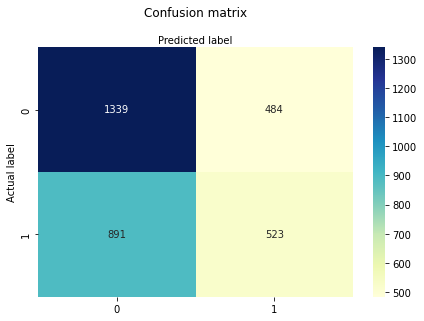

In [46]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:

from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['Not Delayed', 'Delayed']

print(classification_report(y_test 
                            , y_pred_mean 
                            , target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.60      0.73      0.66      1823
     Delayed       0.52      0.37      0.43      1414

    accuracy                           0.58      3237
   macro avg       0.56      0.55      0.55      3237
weighted avg       0.57      0.58      0.56      3237



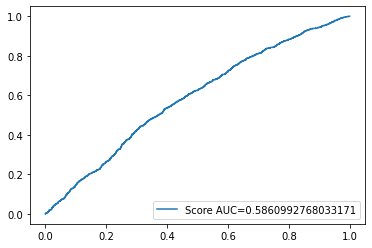

In [50]:
import matplotlib.pyplot as plt

y_pred_proba = reg.predict_proba(X_test_mean)[::,1]


fpr, tpr, _ = metrics.roc_curve(y_test,
                                y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr
         ,label="Score AUC="+str(auc)) 

plt.legend(loc=4)

plt.show()

In [51]:
#### K-NN (K-Nearest Neighbors)

In [52]:
scaler = RobustScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.176887,0.785714,15,125,199,4,0
1,3045.0,-1.014151,-0.842857,12,76,170,1,0
2,1560.0,-0.129717,1.885714,5,235,64,6,0
3,1156.0,-0.471698,1.571429,15,245,162,6,1
4,1873.0,-0.625000,0.114286,4,125,160,5,1


In [53]:
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [55]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.176887,0.785714,15,125,199,4,0
1,3045.0,-1.014151,-0.842857,12,76,170,1,0
2,1560.0,-0.129717,1.885714,5,235,64,6,0
3,1156.0,-0.471698,1.571429,15,245,162,6,1
4,1873.0,-0.625000,0.114286,4,125,160,5,1


In [56]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [58]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [59]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
X_train_mean = imputer_mean.fit_transform(X_train)
X_test_mean = imputer_mean.transform(X_test)

In [60]:
knn = KNeighborsClassifier(n_neighbors= 3) # Menentukan jumlah tetangga terdekat (nearest neighbors)

# Melatih model
knn.fit(X_train_mean, y_train)

# Melakukan validasi silang dengan membagi data pelatihan menjadi 5 lipatan (folds)
k = KFold(n_splits = 5)

# Menghitung skor akurasi untuk setiap lipatan menggunakan metode validasi silang yang telah ditentukan
score = cross_val_score(knn
                        , X_train_mean, y_train
                        , scoring = 'accuracy' #Parameter yang ingin digunakan
                        , cv = k).mean() # cv=k -> jumlah lipatan, .mean() -> menghitung rata-rata skor akurasi

# Mencetak skor akurasi pada set data pelatihan dengan pembulatan ke 3 desimal
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.535


In [61]:
y_pred = knn.predict(X_test_mean)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.527


In [63]:
from sklearn.metrics import classification_report
target_names = ['Not Delayed', 'Delayed']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.58      0.59      0.59      1823
     Delayed       0.46      0.44      0.45      1414

    accuracy                           0.53      3237
   macro avg       0.52      0.52      0.52      3237
weighted avg       0.53      0.53      0.53      3237



In [65]:
accuracy = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_mean,y_train)
    pred_i = knn.predict(X_test_mean)
    accuracy_i = accuracy_score(y_test, pred_i)

    accuracy.append(accuracy_i)

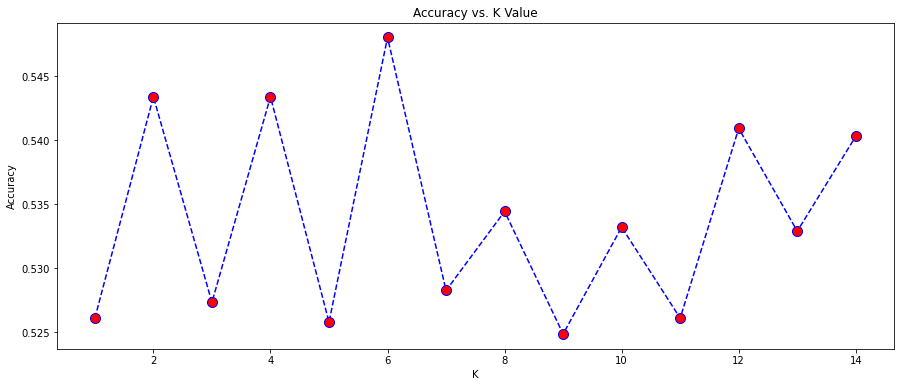

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [68]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train_mean, y_train)
y_pred = knn.predict(X_test_mean)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {round(accuracy * 100, 2)}%")

Accuracy on the test set: 54.34%


In [70]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.57      0.75      0.65      1823
     Delayed       0.46      0.28      0.35      1414

    accuracy                           0.54      3237
   macro avg       0.52      0.51      0.50      3237
weighted avg       0.52      0.54      0.52      3237



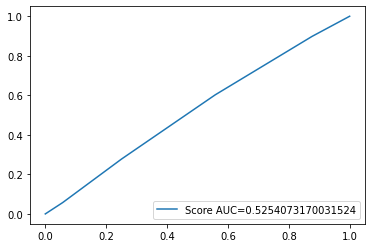

In [71]:
y_pred_proba = knn.predict_proba(X_test_mean)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Score AUC="+str(auc))
plt.legend(loc=4)
plt.show()


Dari ketiga algoritma yang dipakai, algoritma yang manakah yang memiliki akurasi paling tinggi adalah sebagai berikut :
    1. Linear Regression = 56.
    2. KNN = 54.34%